# Introduction

The purpose of this project is to create both a neural network and a logistic regression of an attrition dataset. After creating both models we will then compare both of them to see which one is better.  The data for this particular project will be derived from Kaggle.  
https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction

# Purpose

Employee attrition is a common problem many companies today face. While the data for this particular project cannot represent scenarios or variables that every company can face , it does provide a general idea of what may be potential problems. With that being said our goal for this project will be to use the datasets independent variables to help predict attrition. Note, that in this project the target variable will be **‘attrition’**  which is a binary variable of ‘yes’ or ‘no’. Yes, in the fact that the employee quit/ left their job and no in the fact that they did not.  

# Importing the data and packages 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [2]:
# Load the data
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv') 

# Data Exploration

By running the code data.info() we can both check the size of our data and check if null values exist. The results from running this code tell us data we have 1,470 observations and 35 variables. Note that we have both numerical and categorical variables. Similarly, note that our dataset does not have existing null values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#Lets look at the first 5 observations
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Cleaning

Based on data exploration we have categorical variables in our dataset. Therefor we will check the unique number of categories in each variable before creating dummy variables.

In [5]:
#lets check the number of unique categories in our categorical variables
for column in data.columns:
    if data[column].dtype == 'object':  # if the column is categorical
        num_unique_categories = data[column].nunique()
        print(f'{column}: {num_unique_categories} unique categories')

Attrition: 2 unique categories
BusinessTravel: 3 unique categories
Department: 3 unique categories
EducationField: 6 unique categories
Gender: 2 unique categories
JobRole: 9 unique categories
MaritalStatus: 3 unique categories
Over18: 1 unique categories
OverTime: 2 unique categories


---

The number of unique categories for each categorical variable is low , therefor we can proceed into making dummy variables. Note that we will first start by hardcoding our target variable **attrition**. The reason behind this is because when we run the code *data = pd.get_dummies(data, drop_first=True)* pandas has a hard time interpreting the 'attrition' variable and drops it from the database.

In [6]:
data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})
data = pd.get_dummies(data, drop_first=True)

---

Let us now double check the dummy variables that were created. The data type for categorical variables is now uint8 instead of object. Similarly, note that hardcoding attrition changes its data type to int64.

In [7]:
#checks the datatypes
data.dtypes

Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtComp

___

Before we can move on to feature scaling we must first convert **Attrition** to a non-numeric data type. If we don’t, attrition will be featured scaled along all the other numeric variables in the dataset. Therefor its best to change Attrition to the same data type as all the other dummy variables (uint8).

In [8]:
# Convert the data type of Attrition to uint8
data['Attrition'] = data['Attrition'].astype('uint8')

---

# Feature Scaling : Standardization

If you recall in data exploration, when we used the code '*data.head()*' we had variables like Daily rain and Employee count. Daily rain had values ranging up to a thousand while employee count had values of one. This tells us that our dataset needs to be featured scaled to put variables into a similar scale. For this example, I will use standardization which is a feature scaling method that will scale the predicter value data to have a mean of 0 and a standard deviation of 1.

Note that only the numeric variables should be scaled. Therefor, were going to isolate the numeric variables and scaled them in a new function called **data_scaled**.

In [9]:
# Create a scaler object
scaler = StandardScaler()

# Select only the numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])


# Fit the scaler and transform the data
data_scaled = scaler.fit_transform(numeric_columns)

# Convert back to a dataframe
data_scaled = pd.DataFrame(data_scaled, columns=numeric_columns.columns)

---

Simirlaly were going to also isolate the dummy variables we created and stored them in a new function called **dummy_columns**.

In [10]:
# Get the dummy variables from the original DataFrame
dummy_columns = data.select_dtypes(include=['uint8'])

---

Now that the numeric variables are scaled in **data_scaled** , we need to merger them together with **dummy_columns** to get an updated dataset that has both featured scaled numeric numbers and dummy variables. Note, that it is important to reset the indices before concatenating, because if we don’t pandas can create errors in the merger.

In [11]:
# Reset the indices of both DataFrames
data_scaled = data_scaled.reset_index(drop=True)
dummy_columns = dummy_columns.reset_index(drop=True)

# Combine the scaled DataFrame and the dummy variables
data_scaled = pd.concat([data_scaled, dummy_columns], axis=1)

In [12]:
data_scaled

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,0,0,0,0,0,1,0,0,1,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,0,0,0,0,1,0,0,1,0,0
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,1,0,0,0,0,0,0,0,1,1
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,0,0,0,0,1,0,0,1,0,1
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.0,1.721670,0.254625,-1.224807,1.785511,-0.057788,...,1,0,0,0,0,0,0,1,0,0
1466,0.227347,-0.469754,-0.393938,-1.868426,0.0,1.723332,1.169781,-1.175601,-1.026167,0.845911,...,0,0,0,0,0,0,0,1,0,0
1467,-1.086676,-1.605183,-0.640727,0.085049,0.0,1.726655,-0.660531,1.038693,1.785511,-0.057788,...,0,0,1,0,0,0,0,1,0,1
1468,1.322365,0.546677,-0.887515,0.085049,0.0,1.728317,1.169781,-0.142264,-1.026167,-0.057788,...,0,0,0,0,0,1,0,1,0,0


---

# Multicolinearity check

Based on the visual below we have a few highly correlated features in the dataset. Based of this information we will have to try techniques like regularization in case the model needs improvements.

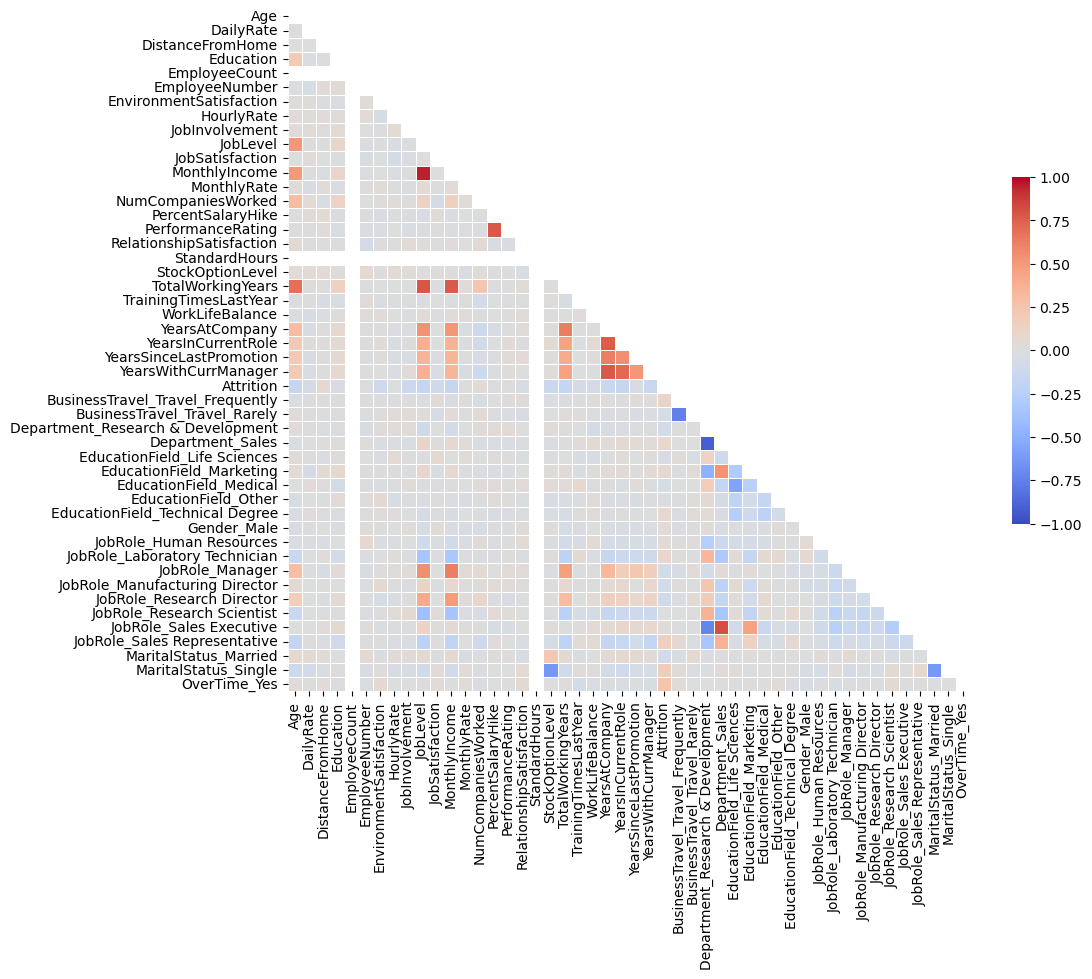

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlations
corr = data_scaled.corr()

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# Data Splitting

Now that our data is scaled and has dummy variables lets split the data into training and testing sets. I first start by creating a new variable called **features** which eliminates the target variable attrition from the rest of the predicter variables. Then I create a variable called **target** which will only include data from the attrition variable. By creating two variables called **features** and **target** I will able to isolate the predicter values from the attrition variable, forming two distinct training(**X_train** and **y_train**) and testing sets (**X_test** and **y_test**). 

In [13]:
#Splits our data into two variables features(predicter variables) and  target(attrition)
features = data_scaled.drop('Attrition', axis=1)
target = data_scaled['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Neural Network

Now we can start building the neural network . For this example I choose to go with three layers and start with 32 units. The ReLU function is preferred in neural networks because it is computationally efficient, easy to implement, and has been shown to work well in similar neural networks.

In [14]:
# Build the neural network
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

---

Compiling the neural network is next , for this I used 'adam' a very popular optimizer that deals really well with noisy data. Similarly, BinerayCrossentropy is commonly used for binary classification problems like ours. Logits=True argument means that the model's final layer has not been passed through an activation function, and the model is outputting the direct logits of the last layer. This is a common setup when using binary cross-entropy, as it makes the model more numerically stable. Lastly, Accuracy provides a simple measure of the proportion of correctly predicted instances, we will use this measure to compare this models accuracy againts another one.

In [15]:
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

---

Now we can start training our model with our training data . For this we used 10 epochs and a batch size of 10. 

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
118/118 [==============================] - 1s 620us/step - loss: 0.4949 - accuracy: 0.8308
Epoch 2/10
118/118 [==============================] - 0s 591us/step - loss: 0.4095 - accuracy: 0.8316
Epoch 3/10
118/118 [==============================] - 0s 594us/step - loss: 0.3744 - accuracy: 0.8316
Epoch 4/10
118/118 [==============================] - 0s 595us/step - loss: 0.3440 - accuracy: 0.8350
Epoch 5/10
118/118 [==============================] - 0s 590us/step - loss: 0.3116 - accuracy: 0.8546
Epoch 6/10
118/118 [==============================] - 0s 594us/step - loss: 0.2880 - accuracy: 0.8750
Epoch 7/10
118/118 [==============================] - 0s 590us/step - loss: 0.2699 - accuracy: 0.8869
Epoch 8/10
118/118 [==============================] - 0s 598us/step - loss: 0.2544 - accuracy: 0.8912
Epoch 9/10
118/118 [==============================] - 0s 603us/step - loss: 0.2399 - accuracy: 0.9014
Epoch 10/10
118/118 [==============================] - 0s 594us/step - loss: 0.228

---

Afterwards, we can call on the Loss function using the same metrics we used on the compiler.

In [17]:
#Loss Function
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

---

This is where everything gets put together, in summary this code is training the model on the X_train data and y_train labels for 10 epochs, evaluating it against the X_test data and y_test labels after each epoch, and storing the history of this process in the function **history** .

In [18]:
# where the training of the neural network actually happens
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
37/37 [==============================] - 1s 4ms/step - loss: 0.2122 - accuracy: 0.9107 - val_loss: 0.3384 - val_accuracy: 0.8810
Epoch 2/10
37/37 [==============================] - 0s 1ms/step - loss: 0.2009 - accuracy: 0.9124 - val_loss: 0.3413 - val_accuracy: 0.8810
Epoch 3/10
37/37 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9209 - val_loss: 0.3445 - val_accuracy: 0.8810
Epoch 4/10
37/37 [==============================] - 0s 1ms/step - loss: 0.1902 - accuracy: 0.9175 - val_loss: 0.3527 - val_accuracy: 0.8776
Epoch 5/10
37/37 [==============================] - 0s 1ms/step - loss: 0.1837 - accuracy: 0.9260 - val_loss: 0.3602 - val_accuracy: 0.8776
Epoch 6/10
37/37 [==============================] - 0s 1ms/step - loss: 0.1787 - accuracy: 0.9252 - val_loss: 0.3594 - val_accuracy: 0.8741
Epoch 7/10
37/37 [==============================] - 0s 1ms/step - loss: 0.1742 - accuracy: 0.9260 - val_loss: 0.3649 - val_accuracy: 0.8776
Epoch 8/10
37/37 [==

# Neural Network Results

The neural network is now complete, lets test the accuracy of the model's predictions by comparing them to the true labels of the test set. 

The results from running the code below indicate that the Neural Network accuracy score was 0.884 which meant that the model correctly predicted the attrition variable ( 0 or 1) about 88.4% of the instances in the test set.

In [24]:
# Calculate the accuracy of the Neural Network model on the test set
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
nn_predictions = (model.predict(X_test) > 0.5).astype(int)
nn_accuracy = accuracy_score(y_test, nn_predictions)

# Print the accuracy
print('Neural Network accuracy: ', nn_accuracy)



10/10 [==============================] - 0s 556us/step
Neural Network accuracy:  0.8741496598639455


Similarly, lets now check the precision, recall, f-1 score of the model.

**Precision**: Precision is the proportion of true positive predictions (in this case, correctly predicted attrition cases) out of all positive predictions made. A precision of about 0.52 means that about 52% of the employees the model predicted would leave (attrition=1) actually did leave. The other 48% of the employees the model predicted would leave did not leave (they were false positives).

**Recall**: Recall, also known as sensitivity or true positive rate, is the proportion of true positive predictions out of all actual positive instances. A recall of about 0.28 means that the model was able to correctly identify about 28% of all employees who actually left the company. The model missed the remaining 72% (they were false negatives).

**F1 Score**: The F1 score is the harmonic mean of precision and recall and tries to balance the two. An F1 score of about 0.37 indicates that the model is not doing a great job of balancing precision and recall. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

In summary, it the nerual network is only catching 28% of the employees who actually leave. When it does predict attrition, it's correct about 52% of the time.There's definitely room for improvement here, we will see how the logistic regression model fairs shortly.

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate predictions on the test set
y_pred_logits = model.predict(X_test)
y_pred_probs = tf.sigmoid(y_pred_logits)
y_pred = tf.round(y_pred_probs)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the scores
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

10/10 [==============================] - 0s 556us/step
Precision:  0.5238095238095238
Recall:  0.28205128205128205
F1 Score:  0.36666666666666664


# Testing the Neural Network

Let us now test the finished neural network with fictitious data to see if we get an attrition value of (0 or 1). For this I will create a new dataframe called **new_data** which will have fictitious data that is both featured scaled and has applied dummy variables.

The result from running the code below indicates a value of 1 , which means that the employee given the data  traits we entered will face attrition. Note, that running the code below can result in a different answer every time , as the model is 88% accurate with a 12% chance of making errors.

In [26]:
new_data = pd.DataFrame({
    'Age': [0.446350],
    'DailyRate': [0.742527],
    'DistanceFromHome': [-1.010909],
    'Education': [-0.891688],
    'EmployeeCount': [0.000000],
    'EmployeeNumber': [-1.701283],
    'EnvironmentSatisfaction': [-0.660531],
    'HourlyRate': [1.383138],
    'JobInvolvement': [0.379672],
    'JobLevel': [-0.057788],
    'JobSatisfaction': [1.153254],
    'MonthlyIncome': [-0.108350],
    'MonthlyRate': [0.726020],
    'NumCompaniesWorked': [2.125136],
    'PercentSalaryHike': [-1.150554],
    'PerformanceRating': [-0.426230],
    'RelationshipSatisfaction': [-1.584178],
    'StandardHours': [0.000000],
    'StockOptionLevel': [-0.932014],
    'TotalWorkingYears': [-0.421642],
    'TrainingTimesLastYear': [-2.171982],
    'WorkLifeBalance': [-2.493820],
    'YearsAtCompany': [-0.164613],
    'YearsInCurrentRole': [-0.063296],
    'YearsSinceLastPromotion': [-0.679146],
    'YearsWithCurrManager': [0.245834],
    'BusinessTravel_Travel_Frequently': [0.000000],
    'BusinessTravel_Travel_Rarely': [1.000000],
    'Department_Research & Development': [0.000000],
    'Department_Sales': [1.000000],
    'EducationField_Life Sciences': [1.000000],
    'EducationField_Marketing': [0.000000],
    'EducationField_Medical': [0.000000],
    'EducationField_Other': [0.000000],
    'EducationField_Technical Degree': [0.000000],
    'Gender_Male': [0.000000],
    'JobRole_Human Resources': [0.000000],
    'JobRole_Laboratory Technician': [0.000000],
    'JobRole_Manager': [0.000000],
    'JobRole_Manufacturing Director': [0.000000],
    'JobRole_Research Director': [0.000000],
    'JobRole_Research Scientist': [0.000000],
    'JobRole_Sales Executive': [1.000000],
    'JobRole_Sales Representative': [0.000000],
    'MaritalStatus_Married': [0.000000],
    'MaritalStatus_Single': [1.000000],
    'OverTime_Yes': [1.000000]
})

# Keep a copy of the original DataFrame
X_train_df = pd.DataFrame(X_train, columns=features.columns)

# Ensure the new data has the same features as the training set
missing_cols = set(X_train_df.columns) - set(new_data.columns)
for c in missing_cols:
    new_data[c] = 0
new_data = new_data[X_train_df.columns]

# Make a prediction
prediction = model.predict(new_data)

# The output is a probability, so you might want to convert it to a class label
prediction_label = (prediction > 0.5).astype(int)

print(prediction_label)

1/1 [==============================] - 0s 11ms/step
[[1]]


# Logistic Regression Model

Using the same data split we used in the neural network (**X_train**,**y_train**,**X_test**, and **y_test**) , lets now create a logistic regression model and compare its accuracy with the neural network.

The results from running the code below, convey that the logistic regression model is 89.8% accurate. This means that this model is slightly more accurate than the neural network model. Will go into more detail next by examing the models precision, recal, and f-1 score.

In [27]:
from sklearn.linear_model import LogisticRegression


# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
logreg_predictions = logreg.predict(X_test)

# Calculate the accuracy of the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# Print the accuracy
print('Logistic Regression accuracy: ', logreg_accuracy)

Logistic Regression accuracy:  0.8979591836734694


Class 0 (No Attrition): The logistic regression model has a high precision of 0.92, meaning that 92% of the instances it predicted as "no attrition" were correct, and only 8% were employees who actually left. The recall of 0.96 shows that the model correctly identified 96% of the employees who stayed. The F1-score, which is a balanced measure of precision and recall, is also high at 0.94.

Class 1 (Attrition): The model's performance is lower on the attrition cases. The precision is 0.67, meaning the model's predictions of attrition are correct 67% of the time. The recall is 0.46, meaning the model only identified 46% of the employees who actually left. The F1-score for this class is 0.55.

Overall Accuracy: The overall accuracy of the model is 0.90, indicating that the model correctly predicted the class for 90% of all cases.

Macro Average: The macro-average F1-score (0.74) is the unweighted mean of the F1-scores for both classes, which is less than the overall accuracy. This is often a better metric when dealing with imbalanced classes, as it treats both classes equally.

Weighted Average: The weighted-average F1-score (0.89) takes class imbalance into account. It's closer to the overall accuracy, reflecting the fact that the majority class (no attrition) is dominating the metrics.

In summary, the logistic regression model is performing well in predicting employees who stay (class 0), but similiar to the neural network it does not do well at predicting employees who leave (class 1). This is fairly common in imbalanced datasets where the majority class is more heavily represented in the data.

In [28]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.67      0.46      0.55        39

    accuracy                           0.90       294
   macro avg       0.79      0.71      0.74       294
weighted avg       0.89      0.90      0.89       294



---

# Comparing the models

Based on these results, the logistic regression model performes better at predicting attrition values (attrition=1).

However, keep in mind that this doesn't necessarily mean that logistic regression is a better choice for this particular problem. The performance of a model can depend on many factors, including the architecture of the model (for neural networks), the hyperparameters, and the way the data is preprocessed.For the linear regression model, regularized regression, like Ridge or Lasso could also improve the model.

Simirlaly , both models might benefit from improved class balance. If the dataset primarly favors class 0 , oversampling the minority class, undersampling the majority class, or using synthetic minority oversampling technique can all be benefitual to both models. 

Finally, note that neural networks have many hyperparameters such as the number of layers, number of neurons in each layer, activation functions, optimizer, learning rate, etc. Selecting the right hyperparameters is crucial for the performance of the model.

---

# Regularization of the Logistic Regression

Considering that the logistic regression model showed more promise let’s see if we can improve the logistic regressions performance. We start by implementing Regularization which can help by mitigating the impact of the correlated features we found by shrinking the coefficients of less important features towards zero.

In [33]:
# Initialize a Logistic Regression model with L1 regularization
model2 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# Fit the model on the training data
model2.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model2.predict(X_test)


The results below show that the logistic regression with regularization performed worse than the original logistic regression model. This however does not mean that regularization is bad for the model, we might just need to tune the value of 'C’ to improve the models performance.

In [34]:
from sklearn.metrics import classification_report

# Generate predictions
y_pred = model2.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.63      0.44      0.52        39

    accuracy                           0.89       294
   macro avg       0.77      0.70      0.73       294
weighted avg       0.88      0.89      0.88       294



# Regularization with optimized 'C' parameter

To find an optimized value of 'C' we can use grid search, where we define a range of possible values for C, train a model for each, and see which one performs best on a validation set. The code below performs cross-validation for each C value specified, and automatically takes care of splitting the data into training and validation sets. The output provides us with the C value that had the best performance which is C=4.28.

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the model with regularization
model2 = LogisticRegression(penalty='l1', solver='liblinear')

# Define the grid of values for C
C = np.logspace(-4, 4, 20)

# Define the hyperparameter grid to search
param_grid = {'C': C}

# Set up the grid search with 5-fold cross validation
grid = GridSearchCV(model2, param_grid, cv=5, scoring='f1')

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

# Print the best parameters
print("Best parameters: ", best_params)


Best parameters:  {'C': 4.281332398719396}


Let us now plug our new optimized value of C and see the results. Given the results below, hyperparameter tuning the regularized logistic regression model did not lead to the substantial improvements we were hoping for. It seems that the data might be imbalance in favor of attrition=0, therefor will have to try other methods to improve the model.

In [39]:
# Extract the best C value
best_C = best_params['C']

# Build the model with the best C
model2 = LogisticRegression(penalty='l1', solver='liblinear', C=best_C)

# Fit the model with the training data
model2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model2.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.56      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.74      0.70      0.72       294
weighted avg       0.87      0.88      0.88       294



# Dealing with Imbalanced data with SMOTE

Considering that were dealing with an imbalance problem in our target variable and that our dataset has 1470 observations, it would be reasonable to try methods that involve oversampling the minority class. One such method is **SMOTE** (Synthetic Minority Over-sampling Technique). SMOTE works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one at a time by a random amount within the difference to the neighboring instances.

In [41]:
!pip install -U imbalanced-learn

     -------------------------------------- 226.0/226.0 kB 4.7 MB/s eta 0:00:00
     -------------------------------------- 301.9/301.9 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [42]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

After using **SMOTE** the logistic regression model's performance has improved on predicting the minority class (1) in terms of both precision and recall. The model is now more accurate in predicting class 1 instances, but the improvement isn't significant and there's room for further improvement.

In [44]:
# Instantiate the model
logreg2 = LogisticRegression(C=best_C, solver='liblinear')

# Train the model with the balanced training data
logreg2.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred2 = logreg2.predict(X_test)

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred2))

# Print a classification report
print(classification_report(y_test, y_pred2))

[[234  21]
 [ 18  21]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       255
           1       0.50      0.54      0.52        39

    accuracy                           0.87       294
   macro avg       0.71      0.73      0.72       294
weighted avg       0.87      0.87      0.87       294

